                a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

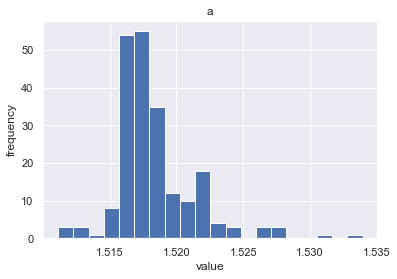

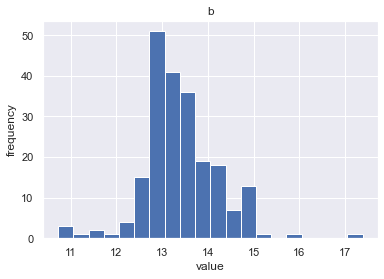

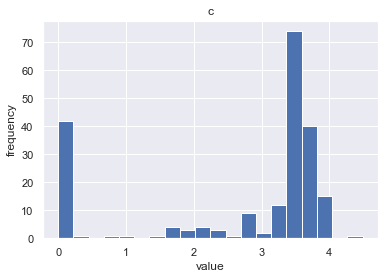

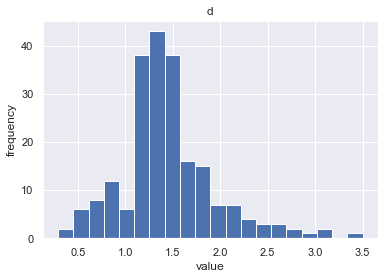

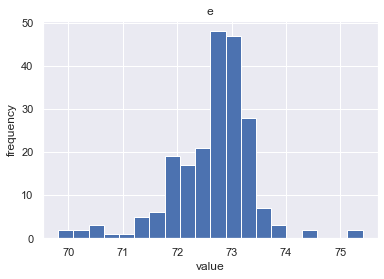

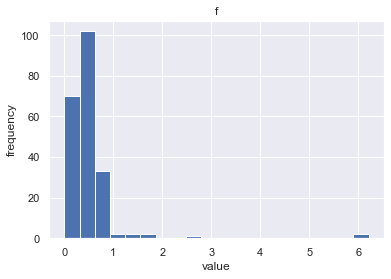

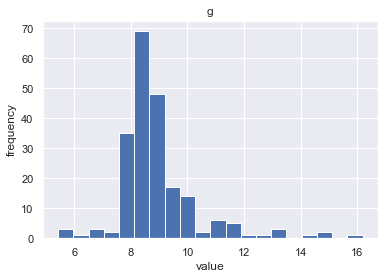

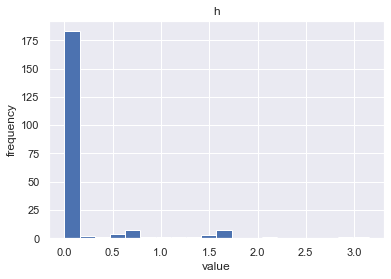

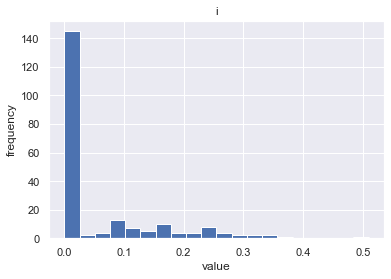


Plot a box plot graph to show the distribution of all the columns. 


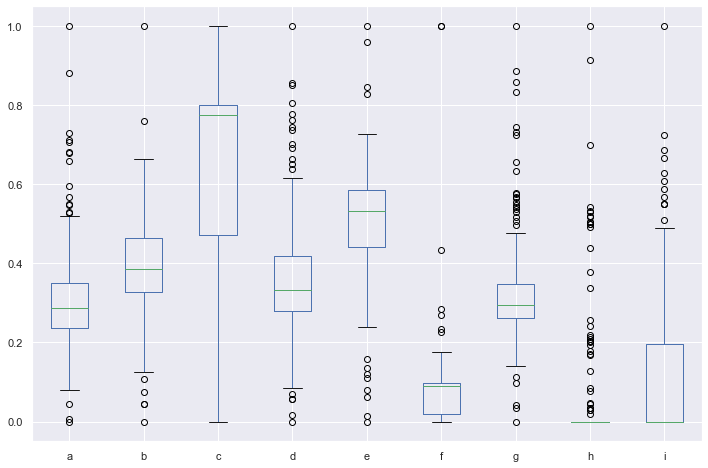

Noticed that some of the addictives are not normally distributed which is non parametric. 
Hence, Spearman correlation heatmap is used to indicate the relationship between the addictives.


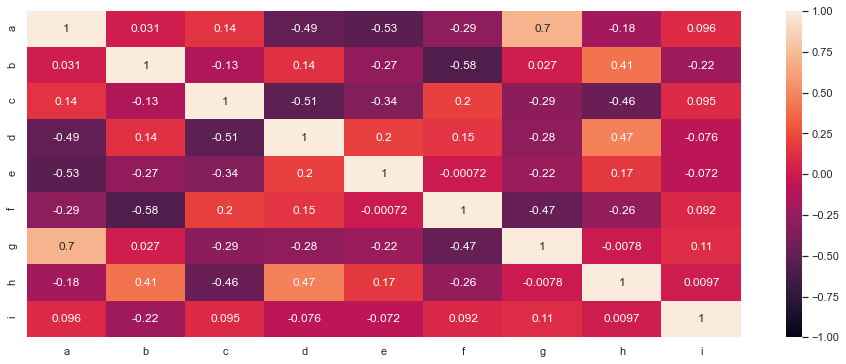

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv("ingredient.csv")
print(dataset.describe())
print("\nFirstly, plot histograms for all addictives to understand the distribution of data.")
for i in dataset:
    plt.hist(dataset[i], bins = 20)
    plt.title(i)
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.show()
    
print("\nPlot a box plot graph to show the distribution of all the columns. ")
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled, index=data.index, columns=data.columns)
scaled_df.plot(kind='box', figsize=[12,8])
plt.show()

print('Noticed that some of the addictives are not normally distributed which is non parametric. \nHence, Spearman correlation heatmap is used to indicate the relationship between the addictives.')

plt.figure(figsize=(16, 6))
sns.heatmap(dataset.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()


           a      b     c     d      e     f      g     h     i
0    1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.00  0.07
1    1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
2    1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.00  0.03
3    1.51768  12.56  3.52  1.43  73.15  0.57   8.54  0.00  0.00
4    1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.00  0.00
..       ...    ...   ...   ...    ...   ...    ...   ...   ...
209  1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.00  0.16
210  1.51848  13.64  3.87  1.27  71.96  0.54   8.32  0.00  0.32
211  1.51784  12.68  3.67  1.16  73.11  0.61   8.70  0.00  0.00
212  1.51841  12.93  3.74  1.11  72.28  0.64   8.96  0.00  0.22
213  1.51321  13.00  0.00  3.02  70.70  6.21   6.93  0.00  0.00

[214 rows x 9 columns]
Use elbow method to find out the optimal value of cluster: 


C:\Users\wjchan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


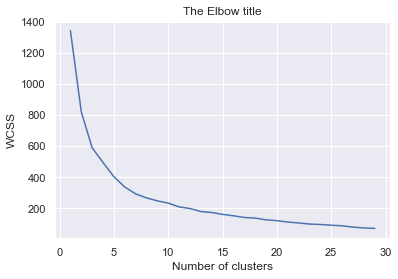

Noticed that the optimal value of cluster is around 3-6. We choose 6 as the number of optimal to show more detail clustering.

Centers of each cluster:
['1.5201', '13.1335', '0.5729', '1.4865', '73.0682', '0.5018', '11.0053', '0.0141', '0.0618']
['1.5173', '13.1208', '3.5024', '1.3735', '72.8181', '0.5677', '8.3963', '0.0052', '0.0655']
['1.5163', '14.6746', '0.1654', '2.1292', '73.3138', '0.0708', '8.5804', '0.9869', '0.0150']
['1.5214', '13.8966', '3.3431', '1.0326', '71.7914', '0.1863', '9.5509', '0.0786', '0.0480']
['1.5283', '11.8671', '0.0000', '1.2186', '71.6729', '0.2514', '14.3157', '0.4500', '0.1371']
['1.5142', '13.6080', '1.8280', '2.7180', '71.0260', '3.4640', '6.1960', '1.0040', '-0.0000']

Distribution of cluster
 [1 4 3 1 1 1 1 5 1 3 1 1 3 1 1 0 1 3 3 1 1 1 2 0 5 1 1 1 0 3 0 3 2 1 1 1 1
 1 3 3 1 0 4 1 0 1 5 1 2 2 1 1 1 1 1 1 1 2 1 5 1 1 1 1 1 3 0 1 1 2 1 2 1 1
 1 1 1 3 1 3 3 1 3 1 2 1 3 3 1 1 1 1 1 1 1 1 3 1 1 2 3 4 1 2 1 3 1 1 1 3 1
 1 1 1 2 2 1 1 1 0 1 4 3 1 1 1 4 1 1

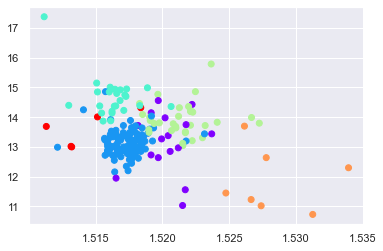

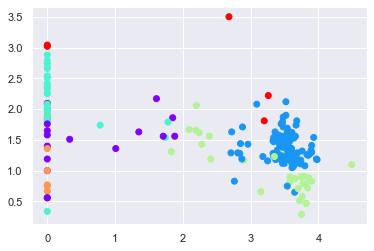

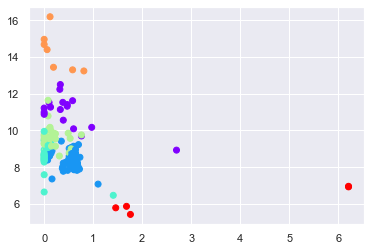

Conclusion: From the study by using clustering method. We predict that there's 6 formulations present in dataset.


In [176]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv("ingredient.csv")
print(data)

print("Use elbow method to find out the optimal value of cluster: ")
wcss=[]
for i in range(1,30):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,30)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

print("Noticed that the optimal value of cluster is around 3-6. We choose 6 as the number of optimal to show more detail clustering.\n")


x = data.iloc[:,:] 

kmeans = KMeans(6)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
print("Centers of each cluster:")
for i in kmeans.cluster_centers_:
    print( [ '%.4f' % elem for elem in i ])
print('\nDistribution of cluster\n',identified_clusters)
unique, counts = np.unique(identified_clusters, return_counts=True)
print('Value counts of all clusters: ',dict(zip(unique, counts)))

print("\nSome scatter plot to show the result of clusetering")
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['a'],data_with_clusters['b'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()
plt.scatter(data_with_clusters['c'],data_with_clusters['d'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()
plt.scatter(data_with_clusters['f'],data_with_clusters['g'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.show()

print("Conclusion: From the study by using clustering method. We predict that there's 6 formulations present in dataset.")